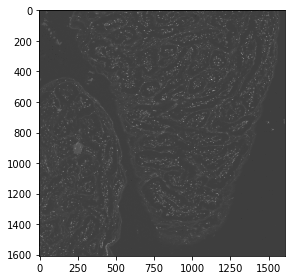

In [3]:
#BR
#Importar las librerias

import numpy as np

from skimage import io, color, filters
from skimage.color import rgb2hed, hed2rgb

#img = io.imread("anillo.jpg")  #leer Imagen
img = io.imread("prueba.png")  #leer Imagen
#print(img.dtype)  #imprimir tipo de dato de la imagen

#planos RGB

R=img[:, :, 0] #Plano Rojo
G=img[:, :, 1] #Plano Verde
B=img[:, :, 2] #Plano Azul


#transladar de imagenes a matrices de numpy

R = np.array(R)+.0
G = np.array(G)+.0
B = np.array(B)+.0

BR = np.empty_like(img) #matriz de ceros

#formula de RGB a Blue-ratio ((100*B)/(1+R+G))*(256/(1+B+R+G))

BR = (np.multiply(np.divide(np.multiply(100.0,B,dtype=float),np.add(np.add(1.0,R),G,dtype=float),dtype=float),np.divide(256.0,np.add(np.add(np.add(1.0,B),R),G,dtype=float),dtype=float),dtype=float))

BR = np.uint8((BR/BR.max())*256) #trasladar de Numpy a uint8
io.imshow(BR) #cargar la matriz para mostrar
io.show() #Imprimir imagen

io.imsave('BR.png',(BR)) #guardar la imagen como BR.png

74


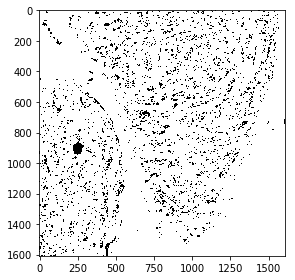

In [21]:
# threshold_otsu 

import numpy as np
import colorsys

from skimage import io, color, filters
from skimage.filters import threshold_otsu

#threshold_otsu
fig = threshold_otsu(BR)
sol = BR <= fig
print(fig)

io.imshow(sol)
io.show()

io.imsave('threshold_otsu.png',(sol))

154


C:\Users\EST_2F_CDR_PC_06\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


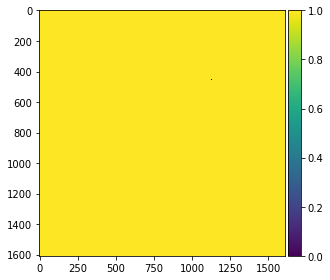

C:\Users\EST_2F_CDR_PC_06\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: threshold_yen.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [18]:
# threshold_yen 

import numpy as np
import colorsys

from skimage import io, color, filters
from skimage.filters import threshold_yen

#threshold_yen

fig = threshold_yen(BR)
sol = BR <= fig
print(fig)

io.imshow(sol)
io.show()

io.imsave('threshold_yen.png',(sol))

C:\Users\EST_2F_CDR_PC_06\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


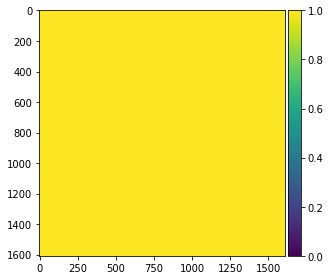

C:\Users\EST_2F_CDR_PC_06\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: threshold_isodata.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [19]:
#threshold_isodata

import numpy as np
import colorsys

from skimage import io, color, filters
from skimage.filters import threshold_isodata

#threshold_isodata

fig = threshold_isodata(BR)
sol = BR > fig

io.imshow(sol)
io.show()

io.imsave('threshold_isodata.png',(sol))

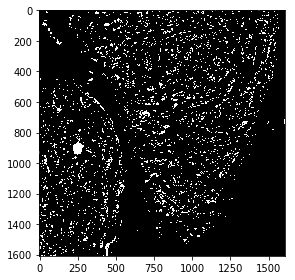

In [17]:
#threshold_li

import numpy as np
import colorsys

from skimage import io, color, filters
from skimage.filters import threshold_li

#threshold_li

fig = threshold_li(BR)
sol = BR > fig

io.imshow(sol)
io.show()

io.imsave('threshold_li.png',(sol))

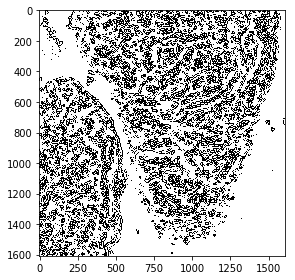

In [7]:
# threshold_otsu (otra libreria)
# a diferencia del otsu de arriba, este se demora mas realizando la operacion

import numpy as np

from skimage import io, color, filters
from skimage.filters.rank import otsu
from skimage.morphology import disk
# esta libreria es para determinar que pixel esta o no dentro del rango del vecindario
# tambien esta rectangle,square,diamond

local_otsu = otsu(BR, disk(5))
thresh_image = BR >= local_otsu

io.imshow(thresh_image)
io.show()

io.imsave('threshold_otsu2.png',(thresh_image))

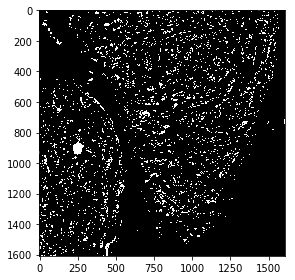

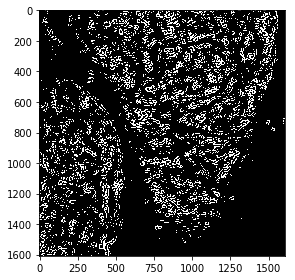

In [37]:
# threshold_minimum

import numpy as np

from skimage import io, color, filters
from skimage.filters import threshold_otsu, threshold_local

#threshold_minimum
global_thresh = threshold_otsu(BR)
binary_global = BR > global_thresh

block_size = 35
adaptive_thresh = threshold_local(BR, block_size, offset=2.5)
binary_adaptive = BR <= adaptive_thresh

io.imshow(binary_global)
io.show()

io.imshow(binary_adaptive)
io.show()

io.imsave('threshold_minimum.png',(binary_global))